In [44]:
import napari
import numpy as np
from numpy.lib.format import open_memmap
import myfunctions as mf
import os
import matplotlib.pyplot as plt
from skimage.measure import regionprops

In [45]:
OS = 'MacOS'
exp = mf.exp_list()[0]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(55, 270, 500, 500)
(55, 270, 500, 500)


In [108]:
viewer = napari.Viewer()

images = [viewer.add_image(hypervolume[:,100:150], name='Volume', opacity=0.4)]
labels = [viewer.add_labels(hypervolume_mask[:,100:150], name='Labels', blending='additive', opacity=0.8)]

settings = napari.settings.get_settings()
settings.application.playback_fps = 5
viewer.dims.current_step = (0, 0)

In [49]:
position = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/position.npy')
volume = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/volume.npy')
speed = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/speed.npy')
volume_exp_rate = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/volume_exp_rate.npy')
avg_volume = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/avg_volume.npy')
agg_number = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/agg_number.npy')

In [ ]:
position, volume, speed, volume_exp_rate, avg_volume, agg_number = mf.motion_matrix(hypervolume_mask, exp)


In [50]:
array_list = [position, volume, speed, volume_exp_rate, avg_volume, agg_number]
for a in array_list:
    print(a.shape)

(55, 1010, 3)
(55, 1010)
(54, 1010, 3)
(54, 1010)
(55, 3, 3)
(55, 3, 3)


In [86]:
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(position.shape[0])/20

Position of the agglomerates (I should do two scatterplots, one from top view and one from side view, plotting the positions of the agglomerates)

Volume of the agglomerates

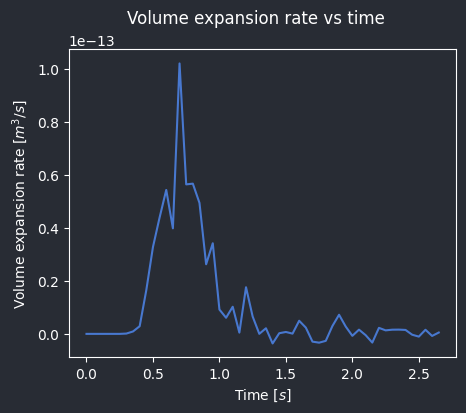

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Volume expansion rate vs time')

ax.plot(time_axis[:-1], np.mean(volume_exp_rate, axis=1))

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
_ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Speed of the agglomerates (**This should also be done region wise!**)

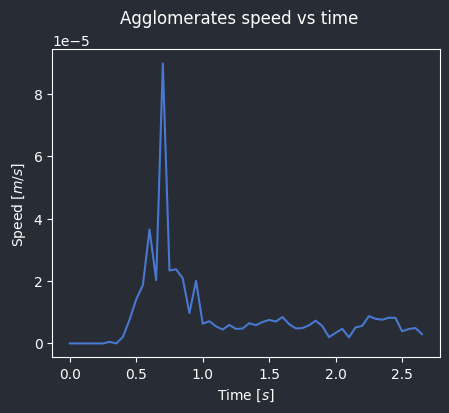

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Agglomerates speed vs time')

speed_norm = np.zeros(speed.shape[0], dtype=np.double)
for i in range(speed.shape[0]):
    speed_norm[i] = np.mean(np.linalg.norm(speed[i, :, :], axis=1))

ax.plot(time_axis[:-1], speed_norm)

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
_ = ax.set_ylabel('Speed [$m/s$]')

Mean volume expansion rate of the agglomerates

Text(0, 0.5, 'Volume expansion rate [$m^3/s$]')

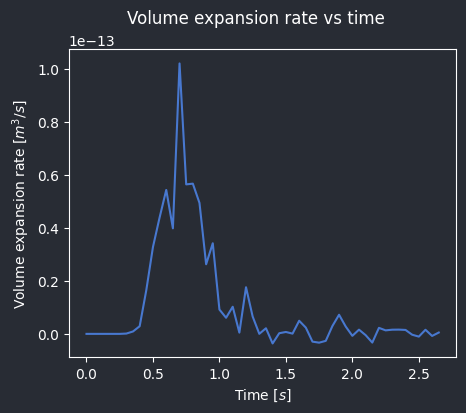

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Volume expansion rate vs time')

ax.plot(time_axis[:-1], np.mean(volume_exp_rate, axis=1))

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise mean volume of the agglomerates

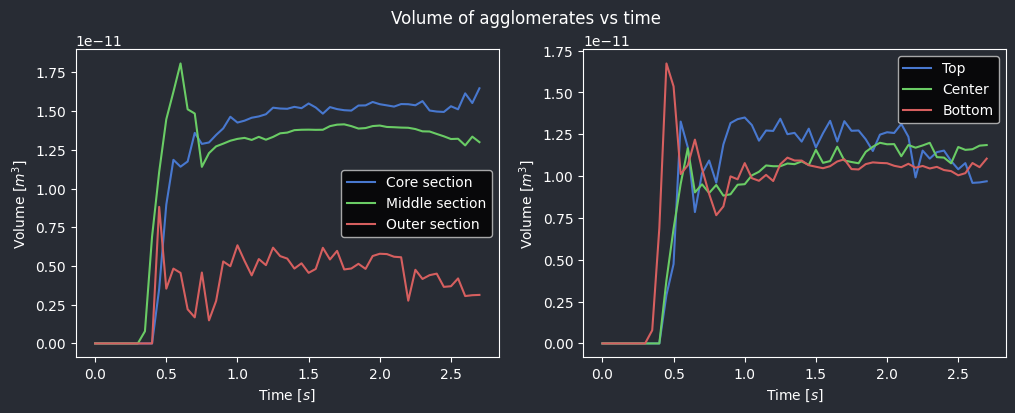

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='#282C34')
fig.suptitle('Volume of agglomerates vs time')

ax = axs[0]
ax.plot(time_axis, np.mean(avg_volume[:,:,0], axis=1), label='Core section')
ax.plot(time_axis, np.mean(avg_volume[:,:,1], axis=1), label='Middle section')
ax.plot(time_axis, np.mean(avg_volume[:,:,2], axis=1), label='Outer section')

ax = axs[1]
ax.plot(time_axis, np.mean(avg_volume[:,0,:], axis=1), label='Top')
ax.plot(time_axis, np.mean(avg_volume[:,1,:], axis=1), label='Center')
ax.plot(time_axis, np.mean(avg_volume[:,2,:], axis=1), label='Bottom')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.legend()
    ax.set_xlabel('Time [$s$]')
    ax.set_ylabel('Volume [$m^3$]')

Region-wise number of agglomerates

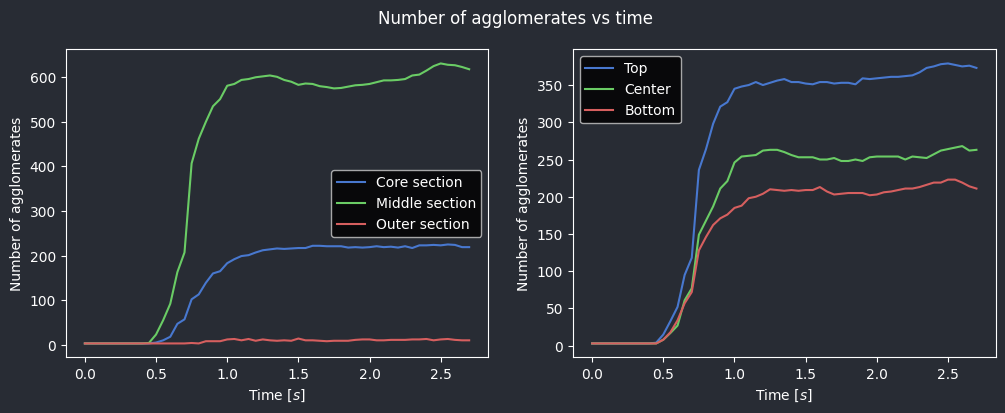

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='#282C34')
fig.suptitle('Number of agglomerates vs time')

ax = axs[0]
ax.plot(time_axis, np.sum(agg_number[:,:,0], axis=1), label='Core section')
ax.plot(time_axis, np.sum(agg_number[:,:,1], axis=1), label='Middle section')
ax.plot(time_axis, np.sum(agg_number[:,:,2], axis=1), label='Outer section')

ax = axs[1]
ax.plot(time_axis, np.sum(agg_number[:,0,:], axis=1), label='Top')
ax.plot(time_axis, np.sum(agg_number[:,1,:], axis=1), label='Center')
ax.plot(time_axis, np.sum(agg_number[:,2,:], axis=1), label='Bottom')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.legend()
    ax.set_xlabel('Time [$s$]')
    ax.set_ylabel('Number of agglomerates')

In [105]:
radii = np.linspace(0, np.max(position[:,:,1]) - np.min(position[:,:,1]) / 2, 3+1)
slices = np.linspace(0, np.max(position[:,:,0]), 3+1)
avg_volume = np.zeros((55, 3, 3), dtype=np.double)
agg_number = np.zeros((55, 3, 3), dtype=np.ushort)
for t in range(55):
        for z in range(3):
            for r in range(3):
                for label in range(1010):
                    if (position[t, label, 0] != 0 and position[t, label, 1] != 0 and position[t, label, 2] != 0 and 
                        slices[z] <= position[t, label, 0] and position[t, label, 0] < slices[z+1] and 
                        radii[r] <= np.linalg.norm(position[t, label, 1:]) and np.linalg.norm(position[t, label, 1:]) < radii[r+1]):
                        avg_volume[t, z, r] += volume[t, label]
                        agg_number[t, z, r] += 1
agg_number[agg_number == 0] = 1
avg_volume = avg_volume / agg_number